In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
nombres_columnas = [
    'PAIS', 'NACIMIENTOS_ANUALES', 'PORCENTAJE_ANTICONCEPCION', 'POLITICA_ABORTO',
    'PORCENTAJE_ANEMIA_EMBARAZO', 'ATENCION_PRENATAL', 'PARTOS_ASISTIDOS',
    'NIVEL_VIH_SIDA', 'PORCENTAJE_INFECUNDIDAD', 'PROMEDIO_NACIMIENTOS_MUJER',
    'MUERTES_MATERNAS', 'CALIFICACION_RIESGO'
]
df_riesgo = pd.read_excel("C:/Users/oscar/Downloads/riesgo.xls", header=None)
df_riesgo.columns = nombres_columnas


df_name = pd.read_excel("C:/Users/oscar/Downloads/riesgo.xls", header= None,sheet_name="Sheet2")

Utilizando la base de datos “riesgo”  hacer un Análisis de Componentes Principales,  sin considerar la última columna (v11  “calificación de riesgo”) es decir sin la columna calif

* Calcule la matriz S (varianzas y covarianzas) ¿las varianzas son del mismo orden?

* Calcule la matriz R (correlación)  ¿hay correlaciones altas? ¿como las interpretas?


* ¿Con cuál de las dos matrices se debe trabajar: S ó R, por qué?


In [3]:
# columnas con nana, imrpimrir que columnas tiene los nan 

df_riesgo.columns[df_riesgo.isna().any()].tolist()

['ATENCION_PRENATAL', 'PARTOS_ASISTIDOS']

In [4]:
df_riesgo.query(" ATENCION_PRENATAL != ATENCION_PRENATAL ")

,PAIS,NACIMIENTOS_ANUALES,PORCENTAJE_ANTICONCEPCION,POLITICA_ABORTO,PORCENTAJE_ANEMIA_EMBARAZO,ATENCION_PRENATAL,PARTOS_ASISTIDOS,NIVEL_VIH_SIDA,PORCENTAJE_INFECUNDIDAD,PROMEDIO_NACIMIENTOS_MUJER,MUERTES_MATERNAS,CALIFICACION_RIESGO
20,Suiza,1,71,3,17,NaN,99.0,1,5,1.5,4,14.3
86,Laos,5,18,5,62,NaN,20.0,1,5,6.3,300,52.4


In [5]:
df_riesgo.query(" PARTOS_ASISTIDOS != PARTOS_ASISTIDOS")

,PAIS,NACIMIENTOS_ANUALES,PORCENTAJE_ANTICONCEPCION,POLITICA_ABORTO,PORCENTAJE_ANEMIA_EMBARAZO,ATENCION_PRENATAL,PARTOS_ASISTIDOS,NIVEL_VIH_SIDA,PORCENTAJE_INFECUNDIDAD,PROMEDIO_NACIMIENTOS_MUJER,MUERTES_MATERNAS,CALIFICACION_RIESGO
114,Congo,15,15,3,54,35.0,NaN,3,21,5.5,900,72.1
117,Zaire,23,8,5,76,90.0,NaN,3,21,6.7,800,76.5


In [6]:
df_riesgo['ATENCION_PRENATAL'].fillna(df_riesgo['ATENCION_PRENATAL'].median(), inplace=True)
df_riesgo['PARTOS_ASISTIDOS'].fillna(df_riesgo['PARTOS_ASISTIDOS'].median(), inplace=True)

df_riesgo['ATENCION_PRENATAL'].fillna(df_riesgo['ATENCION_PRENATAL'].mode()[0], inplace=True)
df_riesgo['PARTOS_ASISTIDOS'].fillna(df_riesgo['PARTOS_ASISTIDOS'].mode()[0], inplace=True)

df_riesgo.query(" PAIS in ([ 'Suiza', 'Laos', 'Congo', 'Zaire'])")[['ATENCION_PRENATAL', 'PARTOS_ASISTIDOS']]


,ATENCION_PRENATAL,PARTOS_ASISTIDOS
20,79.5,99.0
86,79.5,20.0
114,35.0,71.5
117,90.0,71.5


In [7]:
df_riesgo.query(" PAIS in ([ 'Suiza', 'Laos', 'Congo', 'Zaire'])")[['ATENCION_PRENATAL', 'PARTOS_ASISTIDOS']]

,ATENCION_PRENATAL,PARTOS_ASISTIDOS
20,79.5,99.0
86,79.5,20.0
114,35.0,71.5
117,90.0,71.5


In [8]:
df_riesgo

,PAIS,NACIMIENTOS_ANUALES,PORCENTAJE_ANTICONCEPCION,POLITICA_ABORTO,PORCENTAJE_ANEMIA_EMBARAZO,ATENCION_PRENATAL,PARTOS_ASISTIDOS,NIVEL_VIH_SIDA,PORCENTAJE_INFECUNDIDAD,PROMEDIO_NACIMIENTOS_MUJER,MUERTES_MATERNAS,CALIFICACION_RIESGO
0,Italia,1,78,1,10,100.0,100.0,1,6,1.2,4,6.6
1,Dinamarca,1,78,1,8,100.0,99.0,1,6,1.8,3,6.7
2,Noruega,2,76,1,17,95.0,100.0,1,5,1.8,3,8.1
3,Suecia,1,78,1,17,100.0,100.0,1,5,2.0,5,8.4
4,Bélgica,1,79,1,17,90.0,100.0,1,7,1.6,3,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
113,Malí,20,5,5,65,31.0,27.0,2,8,7.1,1750,71.1
114,Congo,15,15,3,54,35.0,71.5,3,21,5.5,900,72.1
115,Somalia,21,5,5,73,2.0,2.0,1,10,7.0,1100,72.8
116,Angola,24,2,5,54,25.0,15.0,2,12,6.6,650,73.5


In [9]:
df_name  

,0,1,2
0,v1,nacimientos anuales por 100 mujeres de 15 a 19...,nacanual
1,v2,% mujeres que usan anticoncepción,anticoncep
2,v3,políticas de aborto,abort
3,v4,% embarazadas con anemia,anemia
4,v5,% mujeres que reciben atencion prenatal,atnprenat
5,v6,% partos asistidos por personal capacitado,partoasit
6,v7,nivel de VIH/SIDA en las mujeres,vihsida
7,v8,% infecundidad en las mujeres,infecun
8,v9,promedio de nacimientos por mujer,nacpormuj
9,v10,"muertes maternas por 100,000 nacimientos",muertes


In [11]:
df_numerico = df_riesgo.drop(columns=['PAIS', 'CALIFICACION_RIESGO'])
# 1. Calcular la Matriz S (Varianzas y Covarianzas)
matriz_S = df_numerico.cov()


In [12]:
# Calcular la matriz de varianzas y covarianzas (S)
S = df_numerico.cov()

# Calcular la matriz de correlaciones (R)
R = df_numerico.corr()

# Obtener eigenvalores y eigenvectores de ambas matrices
eigvals_S, eigvecs_S = np.linalg.eig(S)
eigvals_R, eigvecs_R = np.linalg.eig(R)

S, R, eigvals_S, eigvecs_S, eigvals_R, eigvecs_R

(                            NACIMIENTOS_ANUALES  PORCENTAJE_ANTICONCEPCION  \
 NACIMIENTOS_ANUALES                   41.622555                -130.866652   
 PORCENTAJE_ANTICONCEPCION           -130.866652                 736.848979   
 POLITICA_ABORTO                        5.255106                 -22.801246   
 PORCENTAJE_ANEMIA_EMBARAZO            62.086846                -319.304288   
 ATENCION_PRENATAL                    -97.100391                 446.769883   
 PARTOS_ASISTIDOS                    -122.684413                 619.449804   
 NIVEL_VIH_SIDA                         2.402361                  -9.351514   
 PORCENTAJE_INFECUNDIDAD               11.185716                 -38.528900   
 PROMEDIO_NACIMIENTOS_MUJER            10.340033                 -51.492648   
 MUERTES_MATERNAS                    1468.027814               -6344.747211   
 
                             POLITICA_ABORTO  PORCENTAJE_ANEMIA_EMBARAZO  \
 NACIMIENTOS_ANUALES                5.255106         

In [13]:
S

,NACIMIENTOS_ANUALES,PORCENTAJE_ANTICONCEPCION,POLITICA_ABORTO,PORCENTAJE_ANEMIA_EMBARAZO,ATENCION_PRENATAL,PARTOS_ASISTIDOS,NIVEL_VIH_SIDA,PORCENTAJE_INFECUNDIDAD,PROMEDIO_NACIMIENTOS_MUJER,MUERTES_MATERNAS
NACIMIENTOS_ANUALES,41.622555,-130.866652,5.255106,62.086846,-97.100391,-122.684413,2.402361,11.185716,10.340033,1468.027814
PORCENTAJE_ANTICONCEPCION,-130.866652,736.848979,-22.801246,-319.304288,446.769883,619.449804,-9.351514,-38.528900,-51.492648,-6344.747211
POLITICA_ABORTO,5.255106,-22.801246,2.214689,13.155150,-16.580038,-24.567869,0.294365,0.686513,1.857135,224.548167
PORCENTAJE_ANEMIA_EMBARAZO,62.086846,-319.304288,13.155150,326.391786,-252.485079,-352.845502,4.973707,14.198899,24.297574,3651.032015
ATENCION_PRENATAL,-97.100391,446.769883,-16.580038,-252.485079,699.008040,616.735622,-1.949297,-10.232508,-33.901492,-5733.791105
PARTOS_ASISTIDOS,-122.684413,619.449804,-24.567869,-352.845502,616.735622,902.904100,-8.019484,-27.720846,-47.543655,-7218.537882
NIVEL_VIH_SIDA,2.402361,-9.351514,0.294365,4.973707,-1.949297,-8.019484,0.481023,1.567000,0.743655,99.247284
PORCENTAJE_INFECUNDIDAD,11.185716,-38.528900,0.686513,14.198899,-10.232508,-27.720846,1.567000,12.675359,2.624555,455.545270
PROMEDIO_NACIMIENTOS_MUJER,10.340033,-51.492648,1.857135,24.297574,-33.901492,-47.543655,0.743655,2.624555,4.051781,459.690816
MUERTES_MATERNAS,1468.027814,-6344.747211,224.548167,3651.032015,-5733.791105,-7218.537882,99.247284,455.545270,459.690816,104712.978125


In [18]:
print("Matriz de Varianzas y Covarianzas (S):\n")
matriz_S

Matriz de Varianzas y Covarianzas (S):



,NACIMIENTOS_ANUALES,PORCENTAJE_ANTICONCEPCION,POLITICA_ABORTO,PORCENTAJE_ANEMIA_EMBARAZO,ATENCION_PRENATAL,PARTOS_ASISTIDOS,NIVEL_VIH_SIDA,PORCENTAJE_INFECUNDIDAD,PROMEDIO_NACIMIENTOS_MUJER,MUERTES_MATERNAS
NACIMIENTOS_ANUALES,41.622555,-130.866652,5.255106,62.086846,-97.100391,-122.684413,2.402361,11.185716,10.340033,1468.027814
PORCENTAJE_ANTICONCEPCION,-130.866652,736.848979,-22.801246,-319.304288,446.769883,619.449804,-9.351514,-38.528900,-51.492648,-6344.747211
POLITICA_ABORTO,5.255106,-22.801246,2.214689,13.155150,-16.580038,-24.567869,0.294365,0.686513,1.857135,224.548167
PORCENTAJE_ANEMIA_EMBARAZO,62.086846,-319.304288,13.155150,326.391786,-252.485079,-352.845502,4.973707,14.198899,24.297574,3651.032015
ATENCION_PRENATAL,-97.100391,446.769883,-16.580038,-252.485079,699.008040,616.735622,-1.949297,-10.232508,-33.901492,-5733.791105
PARTOS_ASISTIDOS,-122.684413,619.449804,-24.567869,-352.845502,616.735622,902.904100,-8.019484,-27.720846,-47.543655,-7218.537882
NIVEL_VIH_SIDA,2.402361,-9.351514,0.294365,4.973707,-1.949297,-8.019484,0.481023,1.567000,0.743655,99.247284
PORCENTAJE_INFECUNDIDAD,11.185716,-38.528900,0.686513,14.198899,-10.232508,-27.720846,1.567000,12.675359,2.624555,455.545270
PROMEDIO_NACIMIENTOS_MUJER,10.340033,-51.492648,1.857135,24.297574,-33.901492,-47.543655,0.743655,2.624555,4.051781,459.690816
MUERTES_MATERNAS,1468.027814,-6344.747211,224.548167,3651.032015,-5733.791105,-7218.537882,99.247284,455.545270,459.690816,104712.978125


In [10]:
# Verificar si las varianzas son del mismo orden
print("\nVarianzas de cada variable:\n")
df_numerico.var()


Varianzas de cada variable:



NACIMIENTOS_ANUALES               41.622555
PORCENTAJE_ANTICONCEPCION        736.848979
POLITICA_ABORTO                    2.214689
PORCENTAJE_ANEMIA_EMBARAZO       326.391786
ATENCION_PRENATAL                699.008040
PARTOS_ASISTIDOS                 902.904100
NIVEL_VIH_SIDA                     0.481023
PORCENTAJE_INFECUNDIDAD           12.675359
PROMEDIO_NACIMIENTOS_MUJER         4.051781
MUERTES_MATERNAS              104712.978125
dtype: float64

In [11]:
# 2. Calcular la Matriz R (Correlaciones)
matriz_R = df_numerico.corr()
print("\nMatriz de Correlación (R):\n")
matriz_R



Matriz de Correlación (R):



,NACIMIENTOS_ANUALES,PORCENTAJE_ANTICONCEPCION,POLITICA_ABORTO,PORCENTAJE_ANEMIA_EMBARAZO,ATENCION_PRENATAL,PARTOS_ASISTIDOS,NIVEL_VIH_SIDA,PORCENTAJE_INFECUNDIDAD,PROMEDIO_NACIMIENTOS_MUJER,MUERTES_MATERNAS
NACIMIENTOS_ANUALES,1.000000,-0.747266,0.547344,0.532679,-0.569266,-0.632855,0.536897,0.486989,0.796223,0.703185
PORCENTAJE_ANTICONCEPCION,-0.747266,1.000000,-0.564434,-0.651097,0.622520,0.759445,-0.496718,-0.398673,-0.942395,-0.722312
POLITICA_ABORTO,0.547344,-0.564434,1.000000,0.489294,-0.421394,-0.549402,0.285198,0.129572,0.619960,0.466287
PORCENTAJE_ANEMIA_EMBARAZO,0.532679,-0.651097,0.489294,1.000000,-0.528597,-0.649971,0.396943,0.220752,0.668144,0.624519
ATENCION_PRENATAL,-0.569266,0.622520,-0.421394,-0.528597,1.000000,0.776313,-0.106305,-0.108708,-0.637022,-0.670194
PARTOS_ASISTIDOS,-0.632855,0.759445,-0.549402,-0.649971,0.776313,1.000000,-0.384807,-0.259123,-0.786047,-0.742383
NIVEL_VIH_SIDA,0.536897,-0.496718,0.285198,0.396943,-0.106305,-0.384807,1.000000,0.634609,0.532679,0.442217
PORCENTAJE_INFECUNDIDAD,0.486989,-0.398673,0.129572,0.220752,-0.108708,-0.259123,0.634609,1.000000,0.366229,0.395413
PROMEDIO_NACIMIENTOS_MUJER,0.796223,-0.942395,0.619960,0.668144,-0.637022,-0.786047,0.532679,0.366229,1.000000,0.705737
MUERTES_MATERNAS,0.703185,-0.722312,0.466287,0.624519,-0.670194,-0.742383,0.442217,0.395413,0.705737,1.000000


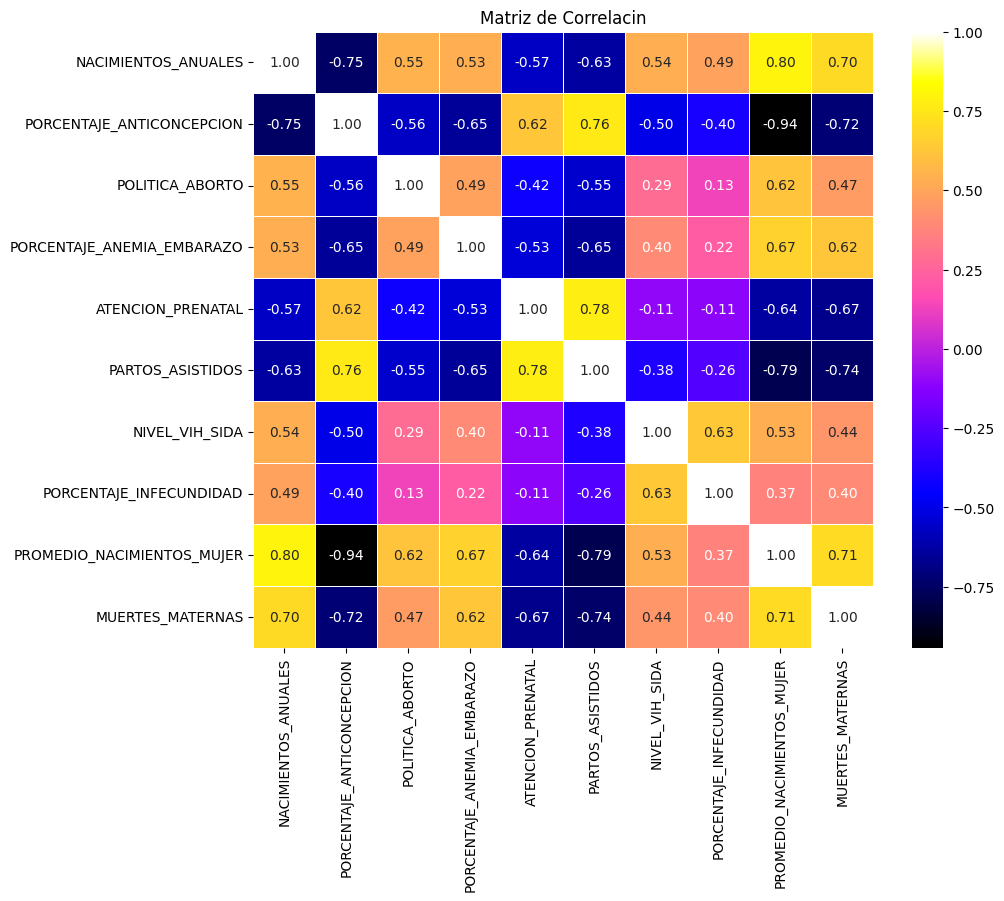

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_R, annot=True, cmap="gnuplot2", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlacin")
plt.show()

In [13]:
# 3. Elección de la Matriz S o R
# Se normalizan los datos solo si las varianzas son muy diferentes
usar_R = df_numerico.var().max() / df_numerico.var().min() > 10
print("\n¿Se debe usar la Matriz R en lugar de S?")
usar_R


¿Se debe usar la Matriz R en lugar de S?


True

In [14]:
# Si la diferencia en las varianzas es alta, se usa R (normalización)
if usar_R:
    # Normalizar los datos (escalar a media 0 y varianza 1)
    scaler = StandardScaler()
    df_escalado = scaler.fit_transform(df_numerico)
    df_numerico = pd.DataFrame(df_escalado, columns=df_numerico.columns)


In [15]:
# 4. Aplicar Análisis de Componentes Principales (PCA)
pca = PCA()
pca.fit(df_numerico)

# Obtener la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente principal:\n")
varianza_explicada


Varianza explicada por cada componente principal:



array([0.60386328, 0.13797538, 0.06745183, 0.05112254, 0.03737387,
       0.03123312, 0.02878531, 0.02348453, 0.01426586, 0.00444429])

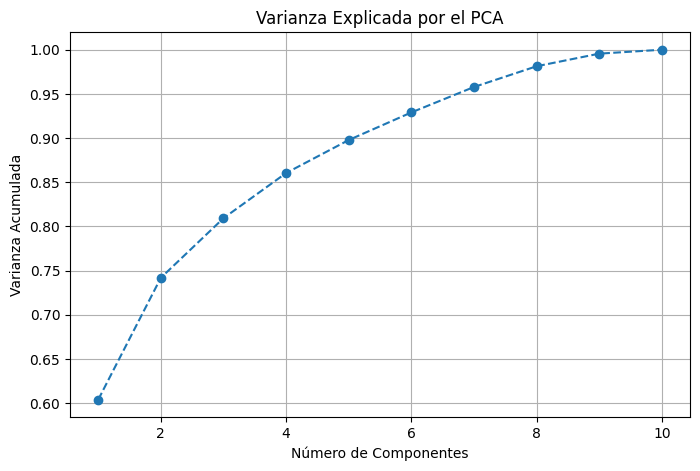

In [16]:
# acumulada 
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), np.cumsum(varianza_explicada), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Explicada por el PCA')
plt.grid(True)
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Normalización de los datos
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)

# Calcular la matriz de covarianzas S
S = np.cov(df_normalized.T)

# Calcular la matriz de correlación R
R = np.corrcoef(df_normalized.T)

# Calcular los eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(R)
print("Matriz de Covarianzas (S):\n", S)
print("\nMatriz de Correlación (R):\n", R)
print("\nEigenvalores:", eigenvalues)
print("\nEigenvectores:\n", eigenvectors)

Matriz de Covarianzas (S):
 [[ 1.00854701 -0.75365316  0.55202265  0.53723187 -0.57413189 -0.638264
   0.54148607  0.49115147  0.80302807  0.70919523]
 [-0.75365316  1.00854701 -0.56925792 -0.65666224  0.62784105  0.76593552
  -0.50096342 -0.40208085 -0.95044971 -0.7284856 ]
 [ 0.55202265 -0.56925792  1.00854701  0.49347589 -0.42499534 -0.55409779
   0.28763569  0.1306798   0.62525926  0.47027187]
 [ 0.53723187 -0.65666224  0.49347589  1.00854701 -0.53311533 -0.65552658
   0.40033534  0.22263892  0.673855    0.62985694]
 [-0.57413189  0.62784105 -0.42499534 -0.53311533  1.00854701  0.78294865
  -0.10721372 -0.10963697 -0.64246709 -0.67592214]
 [-0.638264    0.76593552 -0.55409779 -0.65552658  0.78294865  1.00854701
  -0.38809582 -0.26133747 -0.79276581 -0.74872842]
 [ 0.54148607 -0.50096342  0.28763569  0.40033534 -0.10721372 -0.38809582
   1.00854701  0.64003271  0.53723193  0.44599677]
 [ 0.49115147 -0.40208085  0.1306798   0.22263892 -0.10963697 -0.26133747
   0.64003271  1.00854701

In [31]:
R

array([[ 1.        , -0.74726627,  0.54734449,  0.53267905, -0.56926636,
        -0.63285498,  0.53689721,  0.48698917,  0.79622275,  0.7031851 ],
       [-0.74726627,  1.        , -0.5644337 , -0.6510973 ,  0.62252036,
         0.75944454, -0.49671797, -0.39867339, -0.94239505, -0.72231199],
       [ 0.54734449, -0.5644337 ,  1.        ,  0.48929389, -0.42139369,
        -0.54940205,  0.2851981 ,  0.12957234,  0.61996046,  0.46628652],
       [ 0.53267905, -0.6510973 ,  0.48929389,  1.        , -0.5285974 ,
        -0.64997127,  0.39694267,  0.22075215,  0.66814436,  0.62451917],
       [-0.56926636,  0.62252036, -0.42139369, -0.5285974 ,  1.        ,
         0.77631349, -0.10630513, -0.10870784, -0.63702245, -0.67019398],
       [-0.63285498,  0.75944454, -0.54940205, -0.64997127,  0.77631349,
         1.        , -0.38480687, -0.25912275, -0.78604745, -0.74238326],
       [ 0.53689721, -0.49671797,  0.2851981 ,  0.39694267, -0.10630513,
        -0.38480687,  1.        ,  0.6346087 

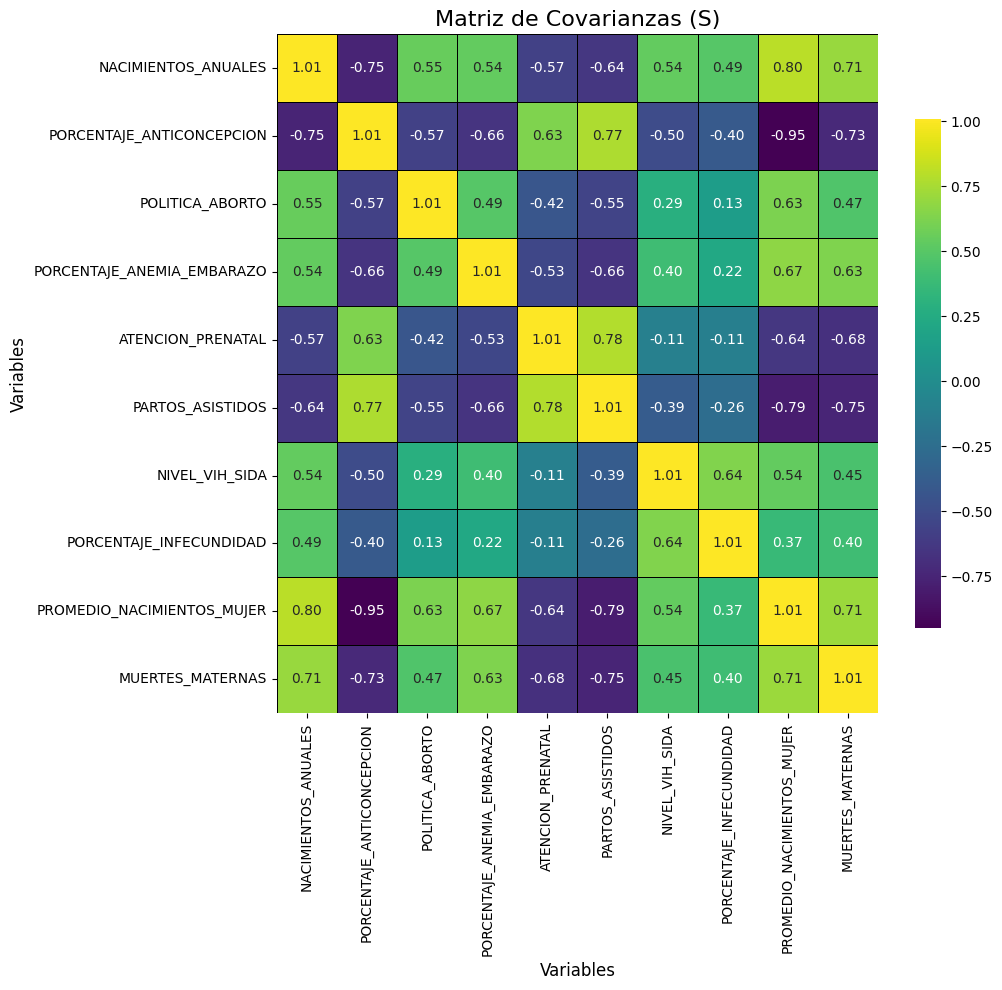

In [ ]:
# Heatmap de la matriz de covarianzas con ajustes estéticos
plt.figure(figsize=(18, 10))

# Usamos un nuevo mapa de colores y estilo para la matriz de covarianzas
plt.subplot(1, 2, 1)
sns.heatmap(S, annot=True, fmt='.2f', cmap='viridis', xticklabels=df_numerico.columns, yticklabels=df_numerico.columns,
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.75}, annot_kws={"size": 10})

plt.title('Matriz de Covarianzas (S)', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

plt.tight_layout()
plt.show()


In [30]:
S

array([[ 1.00854701, -0.75365316,  0.55202265,  0.53723187, -0.57413189,
        -0.638264  ,  0.54148607,  0.49115147,  0.80302807,  0.70919523],
       [-0.75365316,  1.00854701, -0.56925792, -0.65666224,  0.62784105,
         0.76593552, -0.50096342, -0.40208085, -0.95044971, -0.7284856 ],
       [ 0.55202265, -0.56925792,  1.00854701,  0.49347589, -0.42499534,
        -0.55409779,  0.28763569,  0.1306798 ,  0.62525926,  0.47027187],
       [ 0.53723187, -0.65666224,  0.49347589,  1.00854701, -0.53311533,
        -0.65552658,  0.40033534,  0.22263892,  0.673855  ,  0.62985694],
       [-0.57413189,  0.62784105, -0.42499534, -0.53311533,  1.00854701,
         0.78294865, -0.10721372, -0.10963697, -0.64246709, -0.67592214],
       [-0.638264  ,  0.76593552, -0.55409779, -0.65552658,  0.78294865,
         1.00854701, -0.38809582, -0.26133747, -0.79276581, -0.74872842],
       [ 0.54148607, -0.50096342,  0.28763569,  0.40033534, -0.10721372,
        -0.38809582,  1.00854701,  0.64003271

In [ ]:
import numpy as np
R1 = np.array([
    [ 1.        , -0.74726627,  0.54734449,  0.53267905, -0.56926636,
    -0.63285498,  0.53689721,  0.48698917,  0.79622275,  0.7031851 ],
    [-0.74726627,  1.        , -0.5644337 , -0.6510973 ,  0.62252036,
     0.75944454, -0.49671797, -0.39867339, -0.94239505, -0.72231199],
    [ 0.54734449, -0.5644337 ,  1.        ,  0.48929389, -0.42139369,
    -0.54940205,  0.2851981 ,  0.12957234,  0.61996046,  0.46628652],
    [ 0.53267905, -0.6510973 ,  0.48929389,  1.        , -0.5285974 ,
    -0.64997127,  0.39694267,  0.22075215,  0.66814436,  0.62451917],
    [-0.56926636,  0.62252036, -0.42139369, -0.5285974 ,  1.        ,
     0.77631349, -0.10630513, -0.10870784, -0.63702245, -0.67019398],
    [-0.63285498,  0.75944454, -0.54940205, -0.64997127,  0.77631349,
     1.        , -0.38480687, -0.25912275, -0.78604745, -0.74238326],
    [ 0.53689721, -0.49671797,  0.2851981 ,  0.39694267, -0.10630513,
    -0.38480687,  1.        ,  0.6346087 ,  0.53267912,  0.44221714],
    [ 0.48698917, -0.39867339,  0.12957234,  0.22075215, -0.10870784,
    -0.25912275,  0.6346087 ,  1.        ,  0.3662288 ,  0.3954132 ],
    [ 0.79622275, -0.94239505,  0.61996046,  0.66814436, -0.63702245,
    -0.78604745,  0.53267912,  0.3662288 ,  1.        ,  0.70573651],
    [ 0.7031851 , -0.72231199,  0.46628652,  0.62451917, -0.67019398,
    -0.74238326,  0.44221714,  0.3954132 ,  0.70573651,  1.        ]
])
# Calculo de los eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(R1)
eigenvalues, eigenvectors

(array([6.0386328 , 1.37975384, 0.6745183 , 0.04444289, 0.5112254 ,
        0.14265858, 0.37373866, 0.2348453 , 0.31233115, 0.28785308]),
 array([[-0.3477411 ,  0.11990244,  0.01528292,  0.14385594, -0.36354082,
          0.3416464 , -0.10298973,  0.45187761, -0.36875225, -0.49407364],
        [ 0.37143043,  0.01212758, -0.03481716, -0.60874581,  0.03318017,
          0.20153562,  0.48169893,  0.35751544,  0.18480408, -0.23321114],
        [-0.27013267, -0.17887386,  0.75949098,  0.03175113, -0.30514224,
         -0.11848028,  0.43028752, -0.05235786,  0.10240617,  0.10804037],
        [-0.30852044, -0.12210631,  0.10651708,  0.01316083,  0.7861601 ,
          0.02302505,  0.23240089,  0.20936727, -0.39616617,  0.0708221 ],
        [ 0.29785432,  0.39474291,  0.43570066, -0.00882475,  0.18388619,
          0.53110015, -0.12381307, -0.43796944, -0.16676934, -0.12127439],
        [ 0.35336777,  0.2069108 ,  0.16936107, -0.08173835, -0.05225346,
         -0.68863955, -0.02460459,  0.01059